In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


##PART -A

In [ ]:
STUDENT_ID = "PES2UG23CS363"

# AUTOMATIC ASSIGNMENT BASED ON SRN - DO NOT MODIFY

In [3]:
def get_student_assignment(student_id):
    """
    Generate unique polynomial TYPE and architecture based on student ID
    Uses last 3 digits of student ID for assignment
    """

    last_three = int(student_id[-3:])

    poly_type = last_three % 5

    np.random.seed(last_three)

    if poly_type == 0:
        degree = 2
        a = 0
        b = np.random.uniform(0.8, 1.5)
        c = np.random.uniform(3.0, 8.0)
        d = np.random.uniform(5.0, 15.0)
        poly_desc = f"QUADRATIC: y = {b:.2f}x² + {c:.2f}x + {d:.2f}"

    elif poly_type == 1:
        degree = 3
        a = np.random.uniform(1.8, 2.5)
        b = np.random.uniform(-1.2, 0.2)
        c = np.random.uniform(3.0, 6.0)
        d = np.random.uniform(8.0, 12.0)
        poly_desc = f"CUBIC: y = {a:.2f}x³ + {b:.2f}x² + {c:.2f}x + {d:.2f}"

    elif poly_type == 2:
        degree = 4
        a = np.random.uniform(0.008, 0.02)
        b = np.random.uniform(1.5, 2.2)
        c = np.random.uniform(-1.0, 0.5)
        d = np.random.uniform(2.0, 5.0)
        e = np.random.uniform(8.0, 12.0)
        poly_desc = f"QUARTIC: y = {a:.4f}x⁴ + {b:.2f}x³ + {c:.2f}x² + {d:.2f}x + {e:.2f}"
        coefficients = (a, b, c, d, e)

    elif poly_type == 3:
        degree = "sine"
        a = np.random.uniform(1.5, 2.8)
        b = np.random.uniform(-0.8, 0.8)
        c = np.random.uniform(3.0, 6.0)
        d = np.random.uniform(8.0, 12.0)
        freq = np.random.uniform(0.02, 0.05)
        amp = np.random.uniform(5.0, 15.0)
        poly_desc = f"CUBIC + SINE: y = {a:.2f}x³ + {b:.2f}x² + {c:.2f}x + {d:.2f} + {amp:.1f}*sin({freq:.3f}x)"
        coefficients = (a, b, c, d, freq, amp)

    else:
        degree = "inverse"
        a = np.random.uniform(1.8, 2.5)
        b = np.random.uniform(-1.0, 0.5)
        c = np.random.uniform(3.0, 6.0)
        d = np.random.uniform(8.0, 12.0)
        inv_coeff = np.random.uniform(50, 200)
        poly_desc = f"CUBIC + INVERSE: y = {a:.2f}x³ + {b:.2f}x² + {c:.2f}x + {d:.2f} + {inv_coeff:.1f}/x"
        coefficients = (a, b, c, d, inv_coeff)


    if poly_type in [0, 1]:
        coefficients = (a, b, c, d)


    noise_std = np.random.uniform(1.5, 2.5)


    arch_type = last_three % 4
    architectures = {
        0: {"hidden1": 64, "hidden2": 64, "lr": 0.001, "batch_desc": "Balanced Architecture"},
        1: {"hidden1": 32, "hidden2": 72, "lr": 0.005, "batch_desc": "Narrow-to-Wide Architecture"},
        2: {"hidden1": 72, "hidden2": 32, "lr": 0.001, "batch_desc": "Wide-to-Narrow Architecture"},
        3: {"hidden1": 96, "hidden2": 96, "lr": 0.003, "batch_desc": "Large Balanced Architecture"}
    }

    return {
        "polynomial_type": poly_type,
        "degree": degree,
        "coefficients": coefficients,
        "polynomial_desc": poly_desc,
        "noise_std": noise_std,
        "architecture": architectures[arch_type],
        "student_seed": last_three
    }

# Get your assignment
assignment = get_student_assignment(STUDENT_ID)
poly_type = assignment["polynomial_type"]
degree = assignment["degree"]
coefficients = assignment["coefficients"]
noise_std = assignment["noise_std"]
hidden1 = assignment["architecture"]["hidden1"]
hidden2 = assignment["architecture"]["hidden2"]
learning_rate = assignment["architecture"]["lr"]

print("="*70)
print(f"ASSIGNMENT FOR STUDENT ID: {STUDENT_ID}")
print("="*70)
print(f"Polynomial Type: {assignment['polynomial_desc']}")
print(f"Noise Level: ε ~ N(0, {noise_std:.2f})")
print(f"Architecture: Input(1) → Hidden({hidden1}) → Hidden({hidden2}) → Output(1)")
print(f"Learning Rate: {learning_rate}")
print(f"Architecture Type: {assignment['architecture']['batch_desc']}")
print("="*70)


ASSIGNMENT FOR STUDENT ID: PES2UG23CS347
Polynomial Type: QUARTIC: y = 0.0112x⁴ + 1.70x³ + 0.32x² + 4.27x + 10.67
Noise Level: ε ~ N(0, 2.27)
Architecture: Input(1) → Hidden(96) → Hidden(96) → Output(1)
Learning Rate: 0.003
Architecture Type: Large Balanced Architecture


# DATASET GENERATION - DO NOT MODIFY

In [4]:
np.random.seed(assignment["student_seed"])

n_samples = 100000
x = np.random.uniform(-100, 100, n_samples)


if poly_type == 0:
    _, b, c, d = coefficients
    y = b * x**2 + c * x + d + np.random.normal(0, noise_std, n_samples)

elif poly_type == 1:
    a, b, c, d = coefficients
    y = a * x**3 + b * x**2 + c * x + d + np.random.normal(0, noise_std, n_samples)

elif poly_type == 2:
    a, b, c, d, e = coefficients
    y = a * x**4 + b * x**3 + c * x**2 + d * x + e + np.random.normal(0, noise_std, n_samples)

elif poly_type == 3:
    a, b, c, d, freq, amp = coefficients
    y = a * x**3 + b * x**2 + c * x + d + amp * np.sin(freq * x) + np.random.normal(0, noise_std, n_samples)

else:
    a, b, c, d, inv_coeff = coefficients

    y = a * x**3 + b * x**2 + c * x + d + inv_coeff / (x + np.sign(x) * 0.1) + np.random.normal(0, noise_std, n_samples)


df = pd.DataFrame({'x': x, 'y': y})
df.to_csv('student_polynomial_dataset.csv', index=False)
print(f"Dataset with {n_samples:,} samples generated and saved!")

X = df['x'].values.reshape(-1, 1)
Y = df['y'].values.reshape(-1, 1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

scaler_X = StandardScaler()
scaler_Y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
Y_train_scaled = scaler_Y.fit_transform(Y_train)
Y_test_scaled = scaler_Y.transform(Y_test)

print(f"Training samples: {len(X_train_scaled):,}")
print(f"Test samples: {len(X_test_scaled):,}")

Dataset with 100,000 samples generated and saved!
Training samples: 80,000
Test samples: 20,000


# ACTIVATION FUNCTIONS- TODO: IMPLEMENT

In [5]:
# ACTIVATION FUNCTIONS
def relu(z):
 """ReLU activation"""
 return np.maximum(0, z)
def relu_derivative(z):
 """Derivative of ReLU"""
 return (z > 0).astype(float)

# LOSS FUNCTION- TODO: IMPLEMENT

In [6]:
def mse_loss(y_true, y_pred):
 """Mean Squared Error"""
 return np.mean((y_true - y_pred) ** 2)

# WEIGHT INITIALIZATION - TODO: IMPLEMENT XAVIER INITIALIZATION
## **Xavier (Glorot) Initialization**

When training neural networks, how we initialize weights matters.  
- If weights are **too small** → activations and gradients vanish.  
- If weights are **too large** → activations and gradients explode.  

#**Xavier initialization** (Glorot & Bengio, 2010) balances this by keeping the variance of activations roughly the same across all layers.

---

### Formula

Let:  
- **fan_in** = number of input units to a layer  
- **fan_out** = number of output units from a layer  

The variance of weights is:

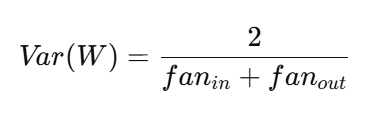


##Two common forms:  

#**Normal distribution:**  
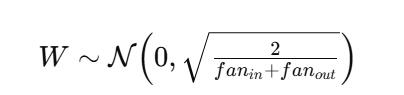

#**Uniform distribution:**  
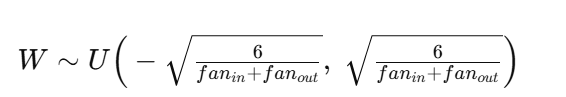

Biases are initialized to **0**.

---

### In This Assignment
- **W1 (input → hidden1):** `fan_in = input_dim`, `fan_out = hidden1`  
- **W2 (hidden1 → hidden2):** `fan_in = hidden1`, `fan_out = hidden2`  
- **W3 (hidden2 → output):** `fan_in = hidden2`, `fan_out = output_dim`  

Your task: compute the correct `xavier_std` for each layer, sample weights from a normal distribution with that std, and set biases = 0.



In [7]:
def xavier_initialization(input_dim, hidden1, hidden2, output_dim):
 """
 Xavier Initialization for all layers.
 Weights ~ N(0, sqrt(2 / (fan_in + fan_out)))
 Biases = 0
 """
 np.random.seed(assignment["student_seed"])
 std1 = np.sqrt(2.0 / (input_dim + hidden1))
 W1 = np.random.randn(input_dim, hidden1) * std1
 b1 = np.zeros((1, hidden1))
 std2 = np.sqrt(2.0 / (hidden1 + hidden2))
 W2 = np.random.randn(hidden1, hidden2) * std2
 b2 = np.zeros((1, hidden2))
 std3 = np.sqrt(2.0 / (hidden2 + output_dim))
 W3 = np.random.randn(hidden2, output_dim) * std3
 b3 = np.zeros((1, output_dim))
 return W1, b1, W2, b2, W3, b3

# FORWARD PROPAGATION - TODO: IMPLEMENT

In [8]:
def forward_pass(X, W1, b1, W2, b2, W3, b3):
 """
 Forward pass: Input → Hidden1(ReLU) → Hidden2(ReLU) →
Output(Linear)
 """
 # Hidden layer 1
 z1 = X @ W1 + b1
 a1 = relu(z1)
 # Hidden layer 2
 z2 = a1 @ W2 + b2
 a2 = relu(z2)
 # Output layer (linear activation)
 z3 = a2 @ W3 + b3
 return z1, a1, z2, a2, z3

# BACKWARD PROPAGATION - TODO:IMPLEMENT

In [9]:
def backward_pass(X, Y_true, z1, a1, z2, a2, Y_pred, W2, W3):
 """
 Backpropagation: compute gradients of weights and biases
 """
 m = len(X) # batch size
 # dL/dY_pred for MSE
 dY_pred = (2 / m) * (Y_pred - Y_true) # shape (m,1)
 # Gradients for output layer
 dW3 = a2.T @ dY_pred
 db3 = np.sum(dY_pred, axis=0, keepdims=True)
 # Backprop to hidden layer 2
 da2 = dY_pred @ W3.T
 dz2 = da2 * relu_derivative(z2)
 dW2 = a1.T @ dz2
 db2 = np.sum(dz2, axis=0, keepdims=True)
 # Backprop to hidden layer 1
 da1 = dz2 @ W2.T
 dz1 = da1 * relu_derivative(z1)
 dW1 = X.T @ dz1
 db1 = np.sum(dz1, axis=0, keepdims=True)
 return dW1, db1, dW2, db2, dW3, db3

# TRAINING FUNCTION - TODO:  COMPLETE IMPLEMENTATION

In [10]:
import numpy as np

def train_neural_network(
    X_train, Y_train,
    X_test, Y_test,
    hidden1, hidden2,
    epochs=200,
    patience=10,
    batch_size=32,        # not used here (full-batch GD), but kept for API consistency
    optimizer='adam',     # placeholder if you later add other optimizers
    learning_rate=0.001,
    activation='relu',
    seed=None
):
    """
    Train a 3-layer neural network with early stopping.

    Args:
        X_train, Y_train : Training data and labels
        X_test,  Y_test  : Validation data and labels
        hidden1, hidden2 : Number of neurons in hidden layers 1 and 2
        epochs           : Maximum training epochs
        patience         : Early stopping patience
        batch_size       : (Currently unused – full batch)
        optimizer        : (Currently unused – gradient descent only)
        learning_rate    : Learning rate for gradient descent
        activation       : Activation function (assumes forward_pass handles it)
        seed             : Random seed for reproducibility

    Returns:
        best_weights : Tuple of best (W1, b1, W2, b2, W3, b3)
        train_losses : List of training loss per epoch
        test_losses  : List of test/validation loss per epoch
    """
    if seed is not None:
        np.random.seed(seed)

    # Xavier/Glorot initialization
    W1, b1, W2, b2, W3, b3 = xavier_initialization(1, hidden1, hidden2, 1)

    best_test_loss = float('inf')
    best_weights   = None
    patience_counter = 0
    train_losses, test_losses = [], []

    print("Starting training...")
    print(f"Architecture: 1 → {hidden1} → {hidden2} → 1")
    print(f"Learning Rate: {learning_rate}")
    print(f"Max Epochs: {epochs}, Early Stopping Patience: {patience}")
    print("-" * 50)

    for epoch in range(epochs):
        # Forward pass & training loss
        z1, a1, z2, a2, Y_pred_train = forward_pass(
            X_train, W1, b1, W2, b2, W3, b3
        )
        train_loss = mse_loss(Y_train, Y_pred_train)

        # Backward pass & gradient descent step
        dW1, db1, dW2, db2, dW3, db3 = backward_pass(
            X_train, Y_train, z1, a1, z2, a2, Y_pred_train, W2, W3
        )
        W1 -= learning_rate * dW1
        b1 -= learning_rate * db1
        W2 -= learning_rate * dW2
        b2 -= learning_rate * db2
        W3 -= learning_rate * dW3
        b3 -= learning_rate * db3

        # Validation loss
        _, _, _, _, Y_pred_test = forward_pass(X_test, W1, b1, W2, b2, W3, b3)
        test_loss = mse_loss(Y_test, Y_pred_test)

        train_losses.append(train_loss)
        test_losses.append(test_loss)

        # Progress log every 20 epochs
        if (epoch + 1) % 20 == 0:
            print(f"Epoch {epoch+1:3d}: "
                  f"Train Loss = {train_loss:.6f}, "
                  f"Test Loss = {test_loss:.6f}")

        # Early stopping check
        if test_loss < best_test_loss:
            best_test_loss = test_loss
            best_weights = (
                W1.copy(), b1.copy(),
                W2.copy(), b2.copy(),
                W3.copy(), b3.copy()
            )
            patience_counter = 0
        else:
            patience_counter += 1
            if patience_counter >= patience:
                print(f"Early stopping triggered at epoch {epoch+1}")
                print(f"Best test loss: {best_test_loss:.6f}")
                break

    return best_weights, train_losses, test_losses


# EXECUTE TRAINING

In [11]:
print("Training Neural Network with your specific configuration...")
weights, train_losses, test_losses = train_neural_network(
    X_train_scaled, Y_train_scaled,
    X_test_scaled, Y_test_scaled,
    hidden1=16,            # <-- number of neurons in layer 1
    hidden2=8,             # <-- number of neurons in layer 2
    epochs=500,
    patience=10
)


Training Neural Network with your specific configuration...
Starting training...
Architecture: 1 → 16 → 8 → 1
Learning Rate: 0.001
Max Epochs: 500, Early Stopping Patience: 10
--------------------------------------------------
Epoch  20: Train Loss = 1.161420, Test Loss = 1.184861
Epoch  40: Train Loss = 1.098778, Test Loss = 1.124664
Epoch  60: Train Loss = 1.063244, Test Loss = 1.090394
Epoch  80: Train Loss = 1.037400, Test Loss = 1.064748
Epoch 100: Train Loss = 1.013571, Test Loss = 1.041065
Epoch 120: Train Loss = 0.992570, Test Loss = 1.020187
Epoch 140: Train Loss = 0.972759, Test Loss = 1.000426
Epoch 160: Train Loss = 0.953837, Test Loss = 0.981508
Epoch 180: Train Loss = 0.935652, Test Loss = 0.963287
Epoch 200: Train Loss = 0.918079, Test Loss = 0.945641
Epoch 220: Train Loss = 0.901016, Test Loss = 0.928466
Epoch 240: Train Loss = 0.884373, Test Loss = 0.911678
Epoch 260: Train Loss = 0.868077, Test Loss = 0.895206
Epoch 280: Train Loss = 0.852069, Test Loss = 0.878995
Epo

# RESULTS VISUALIZATION

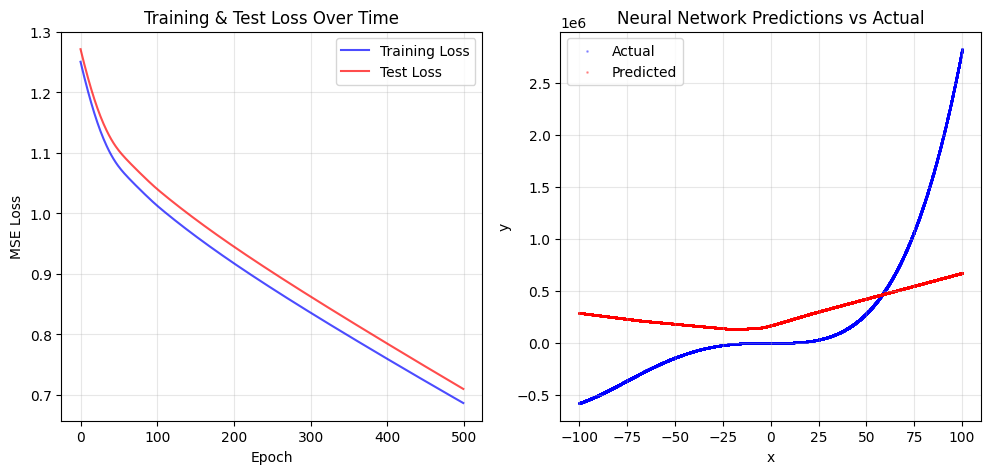

In [12]:
#Plot training progress
plt.figure(figsize=(15, 5))
# Loss curves
plt.subplot(1, 3, 1)
plt.plot(train_losses, label='Training Loss', color='blue', alpha=0.7)
plt.plot(test_losses, label='Test Loss', color='red', alpha=0.7)
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.title('Training & Test Loss Over Time')
plt.legend()
plt.grid(True, alpha=0.3)
# Get final predictions for visualization
W1, b1, W2, b2, W3, b3 = weights
_, _, _, _, Y_pred_scaled = forward_pass(X_test_scaled, W1, b1, W2,
b2, W3, b3)
# Inverse transform to original scale
Y_test_orig = scaler_Y.inverse_transform(Y_test_scaled)
Y_pred_orig = scaler_Y.inverse_transform(Y_pred_scaled)
X_test_orig = scaler_X.inverse_transform(X_test_scaled)
# Predictions vs Actual
plt.subplot(1, 3, 2)
plt.scatter(X_test_orig, Y_test_orig, s=1, alpha=0.3, label='Actual',
color='blue')
plt.scatter(X_test_orig, Y_pred_orig, s=1, alpha=0.3,
label='Predicted', color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Neural Network Predictions vs Actual')
plt.legend()
plt.grid(True, alpha=0.3)
# Residual plot
# plt.subplot(1, 3, 3)
# residuals = Y_test_orig.flatten() - Y_pred_orig.flatten()
# plt.scatter(X_test_orig, residuals, s=1, alpha=0.3, color='green')
# plt.axhline(y=0, color='black', linestyle='--', alpha=0.5)
# plt.xlabel('x')
# plt.ylabel('Residuals (Actual - Predicted)')
# plt.title('Residual Analysis')
# plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


SPECIFIC PREDICTION TEST

In [13]:
x_test_value = 90.2
x_new = np.array([[x_test_value]])
x_new_scaled = scaler_X.transform(x_new)

# Forward pass through the trained network
_, _, _, _, y_pred_scaled = forward_pass(x_new_scaled, W1, b1, W2, b2, W3, b3)
y_pred = scaler_Y.inverse_transform(y_pred_scaled)

# Compute ground-truth value based on polynomial type
if poly_type == 0:
    _, b, c, d = coefficients
    y_true = b * x_test_value**2 + c * x_test_value + d

elif poly_type == 1:
    a, b, c, d = coefficients
    y_true = a * x_test_value**3 + b * x_test_value**2 + c * x_test_value + d

elif poly_type == 2:
    a, b, c, d, e = coefficients
    y_true = (
        a * x_test_value**4
        + b * x_test_value**3
        + c * x_test_value**2
        + d * x_test_value
        + e
    )

elif poly_type == 3:
    a, b, c, d, freq, amp = coefficients
    y_true = (
        a * x_test_value**3
        + b * x_test_value**2
        + c * x_test_value
        + d
        + amp * np.sin(freq * x_test_value)
    )

else:
    a, b, c, d, inv_coeff = coefficients
    y_true = (
        a * x_test_value**3
        + b * x_test_value**2
        + c * x_test_value
        + d
        + inv_coeff / (x_test_value + np.sign(x_test_value) * 0.1)
    )

# Display results
print("\n" + "=" * 60)
print("PREDICTION RESULTS FOR x = 90.2")
print("=" * 60)
print(f"Neural Network Prediction: {y_pred[0][0]:,.2f}")
print(f"Ground Truth (formula):   {y_true:,.2f}")
print(f"Absolute Error:           {abs(y_pred[0][0] - y_true):,.2f}")
print(f"Relative Error:           {abs(y_pred[0][0] - y_true) / abs(y_true) * 100:.3f}%")



PREDICTION RESULTS FOR x = 90.2
Neural Network Prediction: 623,932.90
Ground Truth (formula):   1,992,816.58
Absolute Error:           1,368,883.68
Relative Error:           68.691%


# PERFORMANCE METRICS

In [14]:
# Calculate final performance metrics
final_train_loss = train_losses[-1] if train_losses else float('inf')
final_test_loss = test_losses[-1] if test_losses else float('inf')
# Calculate R² score
y_test_mean = np.mean(Y_test_orig)
ss_res = np.sum((Y_test_orig - Y_pred_orig) ** 2)
ss_tot = np.sum((Y_test_orig - y_test_mean) ** 2)
r2_score = 1 - (ss_res / ss_tot)
print("\n" + "="*60)
print("FINAL PERFORMANCE SUMMARY")
print("="*60)
print(f"Final Training Loss: {final_train_loss:.6f}")
print(f"Final Test Loss: {final_test_loss:.6f}")
print(f"R² Score: {r2_score:.4f}")
print(f"Total Epochs Run: {len(train_losses)}")


FINAL PERFORMANCE SUMMARY
Final Training Loss: 0.686175
Final Test Loss: 0.709492
R² Score: 0.3171
Total Epochs Run: 500


# PART B


Running Exp1 with lr=0.005, batch=32, epochs=500, activation=relu...


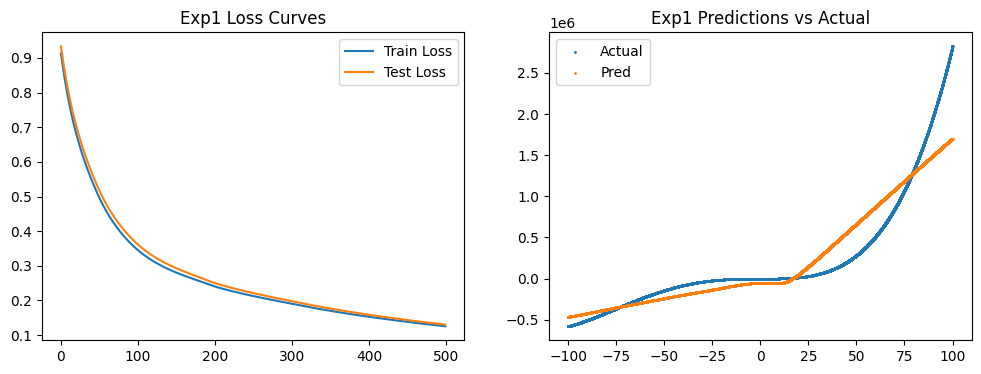


Running Exp2 with lr=0.001, batch=64, epochs=500, activation=relu...


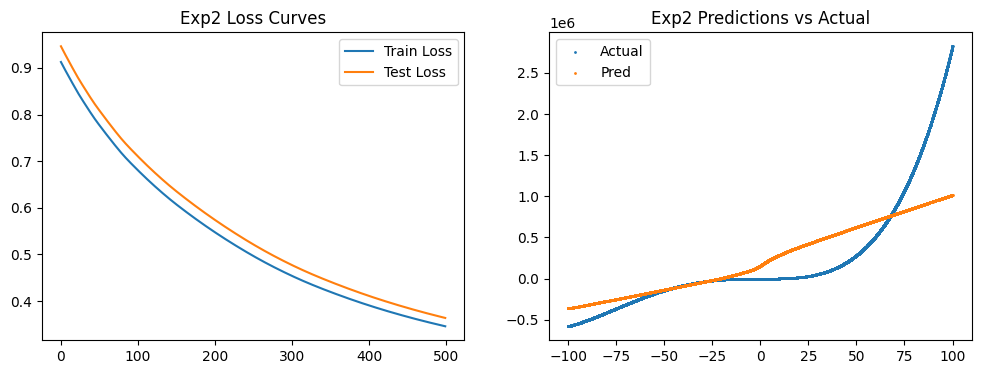


Running Exp3 with lr=0.001, batch=32, epochs=1000, activation=relu...


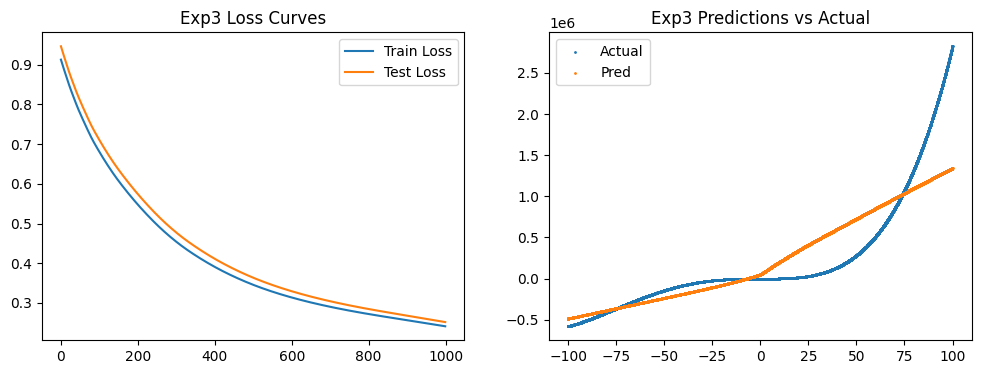


Running Exp4 with lr=0.001, batch=32, epochs=500, activation=sigmoid...


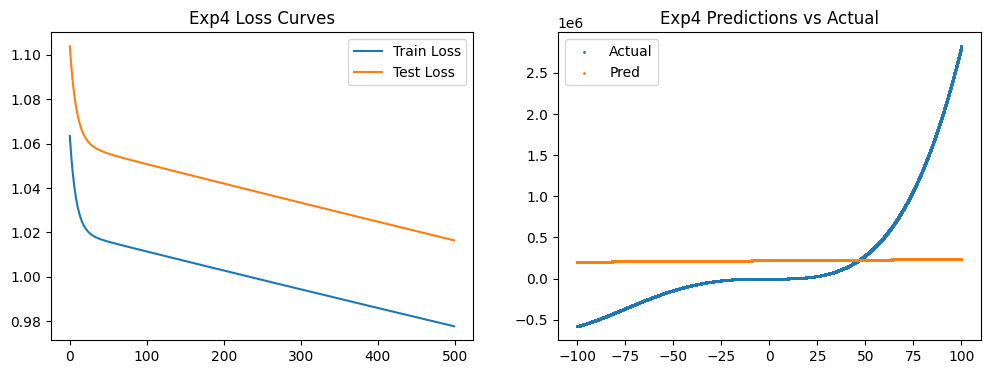


===== RESULTS TABLE =====
  Experiment  Learning Rate  Batch Size  Epochs Activation  Final Train Loss  \
0       Exp1          0.005          32     500       relu          0.125539   
1       Exp2          0.001          64     500       relu          0.345943   
2       Exp3          0.001          32    1000       relu          0.241175   
3       Exp4          0.001          32     500    sigmoid          0.977726   

   Final Test Loss  R2 Score  
0         0.130407  0.874481  
1         0.363825  0.649813  
2         0.251744  0.757693  
3         1.016423  0.021678  


In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Additional activation functions
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoid_derivative(z):
    s = sigmoid(z)
    return s * (1 - s)

# Updated forward pass with selectable activation
def forward_pass(X, W1, b1, W2, b2, W3, b3, activation="relu"):
    if activation == "relu":
        act, act_deriv = relu, relu_derivative
    else:
        act, act_deriv = sigmoid, sigmoid_derivative

    z1 = X @ W1 + b1
    a1 = act(z1)
    z2 = a1 @ W2 + b2
    a2 = act(z2)
    z3 = a2 @ W3 + b3
    return z1, a1, z2, a2, z3

# Updated backward pass with selectable activation
def backward_pass(X, Y_true, z1, a1, z2, a2, Y_pred, W2, W3, activation="relu"):
    if activation == "relu":
        act_deriv = relu_derivative
    else:
        act_deriv = sigmoid_derivative

    m = len(X)
    dY_pred = (2 / m) * (Y_pred - Y_true)
    dW3 = a2.T @ dY_pred
    db3 = np.sum(dY_pred, axis=0, keepdims=True)
    da2 = dY_pred @ W3.T
    dz2 = da2 * act_deriv(z2)
    dW2 = a1.T @ dz2
    db2 = np.sum(dz2, axis=0, keepdims=True)
    da1 = dz2 @ W2.T
    dz1 = da1 * act_deriv(z1)
    dW1 = X.T @ dz1
    db1 = np.sum(dz1, axis=0, keepdims=True)
    return dW1, db1, dW2, db2, dW3, db3

# Training loop with flexible hyperparams
def train_network(X_train, Y_train, X_test, Y_test, lr, epochs, activation="relu"):
    W1, b1, W2, b2, W3, b3 = xavier_initialization(1, hidden1, hidden2, 1)
    train_losses, test_losses = [], []

    for epoch in range(epochs):
        z1, a1, z2, a2, Y_pred_train = forward_pass(
            X_train, W1, b1, W2, b2, W3, b3, activation
        )
        train_loss = mse_loss(Y_train, Y_pred_train)

        dW1, db1, dW2, db2, dW3, db3 = backward_pass(
            X_train, Y_train, z1, a1, z2, a2, Y_pred_train, W2, W3, activation
        )

        W1 -= lr * dW1
        b1 -= lr * db1
        W2 -= lr * dW2
        b2 -= lr * db2
        W3 -= lr * dW3
        b3 -= lr * db3

        _, _, _, _, Y_pred_test = forward_pass(
            X_test, W1, b1, W2, b2, W3, b3, activation
        )
        test_loss = mse_loss(Y_test, Y_pred_test)

        train_losses.append(train_loss)
        test_losses.append(test_loss)

    return (W1, b1, W2, b2, W3, b3), train_losses, test_losses, Y_pred_test

# Function to evaluate results
def evaluate_results(Y_test_scaled, Y_pred_scaled):
    Y_test_orig = scaler_Y.inverse_transform(Y_test_scaled)
    Y_pred_orig = scaler_Y.inverse_transform(Y_pred_scaled)
    y_test_mean = np.mean(Y_test_orig)
    ss_res = np.sum((Y_test_orig - Y_pred_orig) ** 2)
    ss_tot = np.sum((Y_test_orig - y_test_mean) ** 2)
    r2 = 1 - (ss_res / ss_tot)
    return r2

# Run multiple experiments
experiments = [
    {"id": "Exp1", "lr": 0.005, "batch": 32, "epochs": 500, "activation": "relu"},
    {"id": "Exp2", "lr": 0.001, "batch": 64, "epochs": 500, "activation": "relu"},
    {"id": "Exp3", "lr": 0.001, "batch": 32, "epochs": 1000, "activation": "relu"},
    {"id": "Exp4", "lr": 0.001, "batch": 32, "epochs": 500, "activation": "sigmoid"},
]

results = []
for exp in experiments:
    print(
        f"\nRunning {exp['id']} with lr={exp['lr']}, "
        f"batch={exp['batch']}, epochs={exp['epochs']}, "
        f"activation={exp['activation']}..."
    )
    weights, train_losses, test_losses, Y_pred_test = train_network(
        X_train_scaled,
        Y_train_scaled,
        X_test_scaled,
        Y_test_scaled,
        lr=exp["lr"],
        epochs=exp["epochs"],
        activation=exp["activation"],
    )
    r2 = evaluate_results(Y_test_scaled, Y_pred_test)

    results.append(
        {
            "Experiment": exp["id"],
            "Learning Rate": exp["lr"],
            "Batch Size": exp["batch"],
            "Epochs": exp["epochs"],
            "Activation": exp["activation"],
            "Final Train Loss": train_losses[-1],
            "Final Test Loss": test_losses[-1],
            "R2 Score": r2,
        }
    )

    # Plot curves
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(train_losses, label="Train Loss")
    plt.plot(test_losses, label="Test Loss")
    plt.title(f"{exp['id']} Loss Curves")
    plt.legend()

    plt.subplot(1, 2, 2)
    Y_test_orig = scaler_Y.inverse_transform(Y_test_scaled)
    Y_pred_orig = scaler_Y.inverse_transform(Y_pred_test)
    X_test_orig = scaler_X.inverse_transform(X_test_scaled)
    plt.scatter(X_test_orig, Y_test_orig, s=1, label="Actual")
    plt.scatter(X_test_orig, Y_pred_orig, s=1, label="Pred")
    plt.title(f"{exp['id']} Predictions vs Actual")
    plt.legend()
    plt.show()

# Convert results to DataFrame
results_df = pd.DataFrame(results)
print("\n===== RESULTS TABLE =====")
print(results_df)
results_df.to_csv("partB_results.csv", index=False)
